In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns

import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn.functional as F
from torch import nn, optim

from sklearn.datasets import make_moons

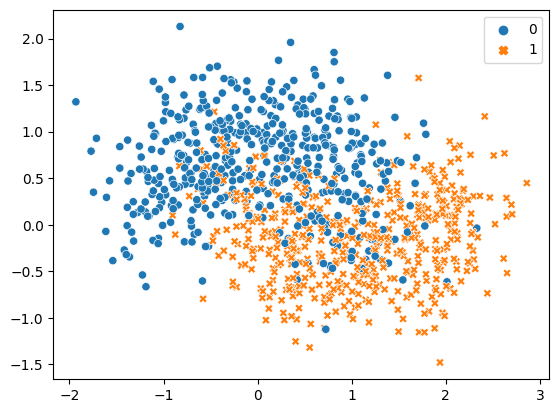

In [3]:
x_train, y_train = make_moons(n_samples=1000, noise=0.4)
x_test, y_test= make_moons(n_samples=10, noise=0.4)

train_dataset = TensorDataset(
  torch.tensor(x_train, dtype=torch.float32),
  torch.tensor(y_train, dtype=torch.long)
)

test_dataset = TensorDataset(
  torch.tensor(x_test, dtype=torch.float32),
  torch.tensor(y_test, dtype=torch.long)
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train, style=y_train);

In [4]:
from idlmam import train_simple_network
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
in_features, out_features = 2, 2
model = nn.Sequential(
  nn.Linear(in_features, 30),
  nn.Tanh(),
  nn.Linear(30, 30),
  nn.Tanh(),
  nn.Linear(30, out_features)
)

loss_func = nn.CrossEntropyLoss()
score_funcs = {'Acc':accuracy_score, 'F1':f1_score, 'AUC': roc_auc_score}

In [6]:
from idlmam import train_simple_network

results = train_simple_network(model,
                              loss_func,
                              train_loader, 
                              test_loader,
                              epochs=20,
                              checkpoint_file='model.pt',
                              score_funcs=score_funcs)                  

Training:   0%|                                                                                                     | 0/32 [00:00<?, ?it/s]
                                                                                                                                           
Testing:   0%|                                                                                                       | 0/1 [00:00<?, ?it/s]
                                                                                                                                           
Training:   0%|                                                                                                     | 0/32 [00:00<?, ?it/s]
                                                                                                                                           
Training:   0%|                                                                                                     | 0/32 [00:00<?, ?it/s]
                    

Training:   0%|                                                                                                     | 0/32 [00:00<?, ?it/s]
                                                                                                                                           
Testing:   0%|                                                                                                       | 0/1 [00:00<?, ?it/s]
                                                                                                                                           
Training:   0%|                                                                                                     | 0/32 [00:00<?, ?it/s]
                                                                                                                                           
Training:   0%|                                                                                                     | 0/32 [00:00<?, ?it/s]
                    

In [7]:
results

,epoch,total time,train loss,test loss,train Acc,test Acc,train F1,test F1,train AUC,test AUC
0,0,0.057086,0.679386,0.689693,0.526,0.6,0.098859,0.333333,0.526,0.6
1,1,0.105584,0.669640,0.687990,0.596,0.6,0.331126,0.333333,0.596,0.6
2,2,0.158655,0.661388,0.686443,0.691,0.6,0.572614,0.333333,0.691,0.6
3,3,0.209636,0.652121,0.685022,0.738,0.5,0.670025,0.285714,0.738,0.5
4,4,0.255320,0.644698,0.683785,0.768,0.5,0.724466,0.285714,0.768,0.5
5,5,0.301091,0.635329,0.682726,0.787,0.5,0.754325,0.285714,0.787,0.5
6,6,0.347647,0.627826,0.681828,0.795,0.6,0.769404,0.500000,0.795,0.6
7,7,0.419918,0.621299,0.681076,0.794,0.6,0.771619,0.500000,0.794,0.6
8,8,0.485164,0.613249,0.680430,0.801,0.6,0.782988,0.500000,0.801,0.6
9,9,0.550084,0.607372,0.679874,0.803,0.6,0.787027,0.500000,0.803,0.6


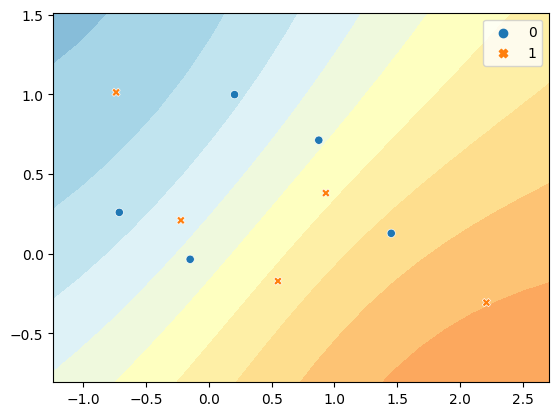

In [8]:
from idlmam import visualize2DSoftmax

visualize2DSoftmax(x_test, y_test, model)

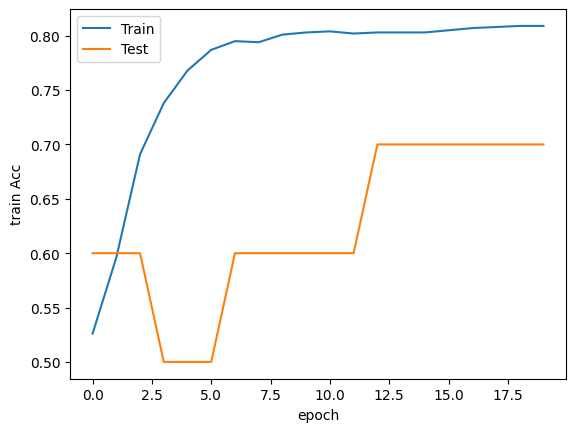

In [9]:
sns.lineplot(x='epoch', y='train Acc', data=results, label='Train');
sns.lineplot(x='epoch', y='test Acc', data=results, label='Test');

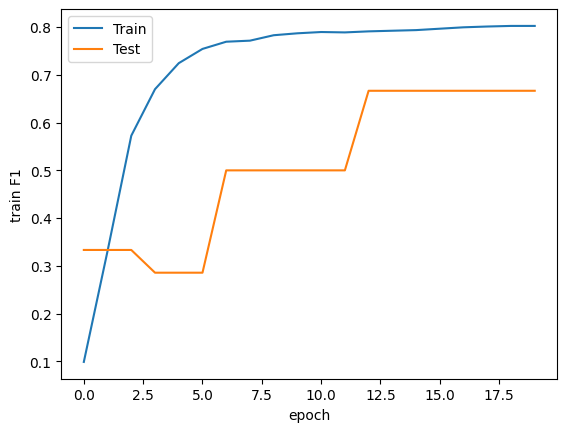

In [10]:
sns.lineplot(x='epoch', y='train F1', data=results, label='Train');
sns.lineplot(x='epoch', y='test F1', data=results, label='Test');